# PHASE 2- CENSUS INCOME PROJECT

Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


We have to build a model that can predict whether the income is more than $50k or not on the basis of the details provided in the dataset. So, this is a BINARY CLASSIFICATION PROBLEM.

-Steps followed in the project-

We need to apply feature engineering/ EDA on the dataset. After that you can split the dataset into train_model and test_model; use this train_model to train our model and test_model to validate our model.

After splitting the dataset we need to train at least 4-5 models.

Check performance of each model

For classification problem- create classification models and check confusion matrix, classification report, accuracy and plot AUC_ROC.

Check the cross validation score for each model(for classification as well as for regression model).

Choose the model as the best model.

For classification problem- model with least difference between performance parameters and cross validation computed on same performance parameter is the best model. Example- Difference between accuracy and cross validation computed on accuracy scoring parameter.

Perform hyper parameter tuning on the best model and check performance of the best model.

Save the best model.

-Steps in EDA and Preprocessing:

Identification of variables and data types

Analyzing the basic metrics

Non-Graphical Univariate Analysis

Missing value treatment

Graphical Univariate Analysis

Bivariate Analysis

Encoding the categorical Data

Outlier treatment

Variable transformations

Correlation Analysis

Dimensionality Reduction

Use of Resampling Techniques to handle Imbalanced Data (For classification problem only)

Scaling of Independent features


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('censusi.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We see there are no nan values in the dataset.

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

EDA-

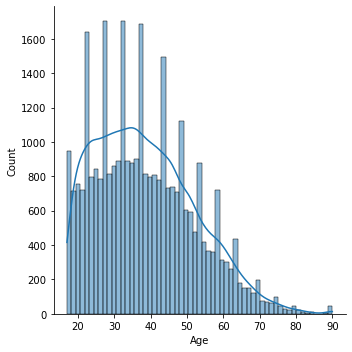

In [7]:
import seaborn as sns
sns.displot(df['Age'],kde=True)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


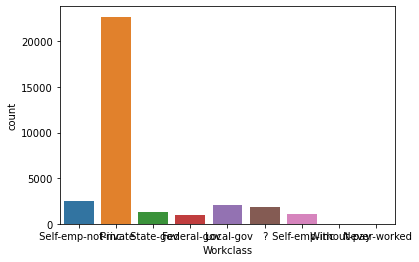

In [8]:
sns.countplot(x='Workclass',data=df)
print(df['Workclass'].value_counts())

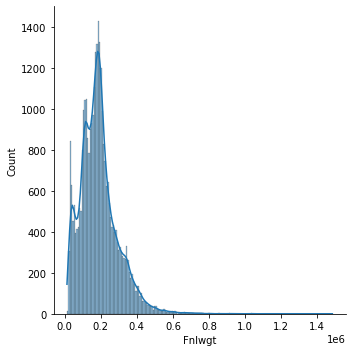

In [9]:
sns.displot(df['Fnlwgt'],kde=True)

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


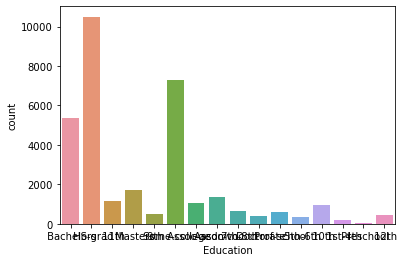

In [10]:
sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

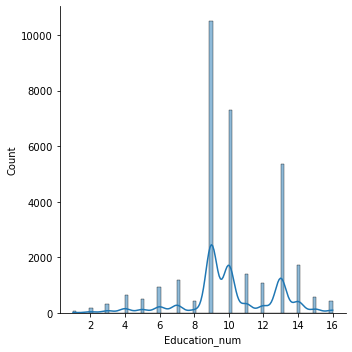

In [11]:
sns.displot(df['Education_num'],kde=True)

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


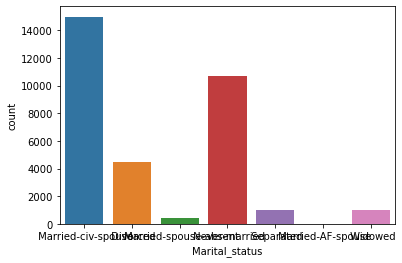

In [12]:
sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


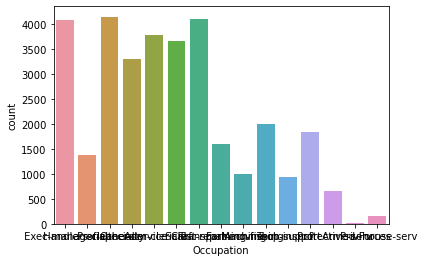

In [13]:
sns.countplot(x='Occupation',data=df)
print(df['Occupation'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


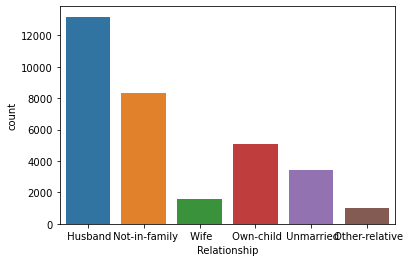

In [14]:
sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


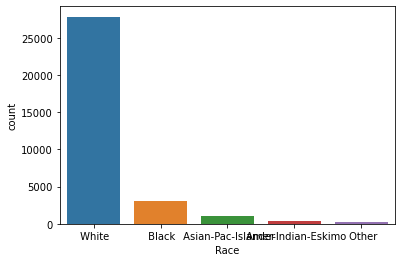

In [15]:
sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


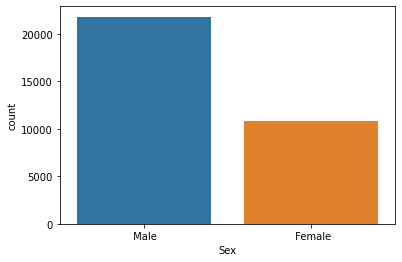

In [16]:
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

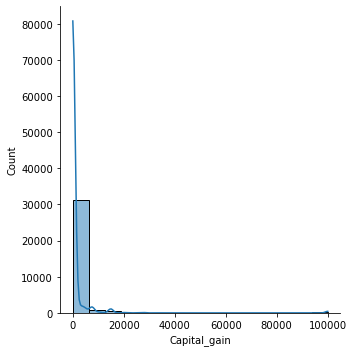

In [17]:
sns.displot(df['Capital_gain'],kde=True)

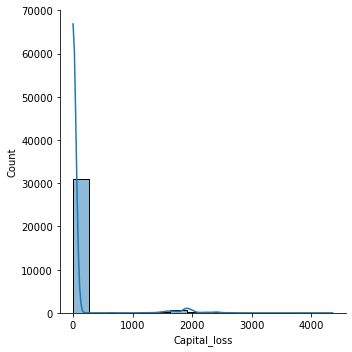

In [18]:
sns.displot(df['Capital_loss'],kde=True)

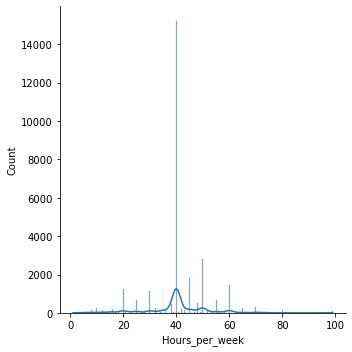

In [19]:
sns.displot(df['Hours_per_week'],kde=True)

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

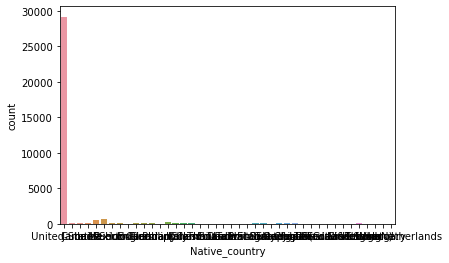

In [20]:
sns.countplot(x='Native_country',data=df)
print(df['Native_country'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


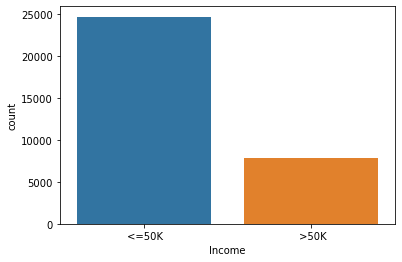

In [21]:
sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

BIVARIATE ANALYSIS-

<AxesSubplot:xlabel='Age', ylabel='Sex'>

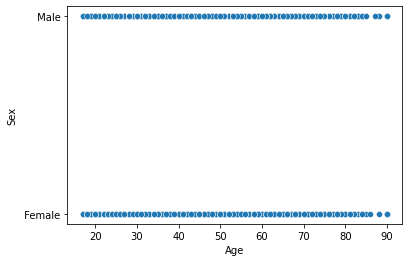

In [22]:
sns.scatterplot(x='Age',y='Sex',data=df)

<AxesSubplot:xlabel='Workclass', ylabel='Education'>

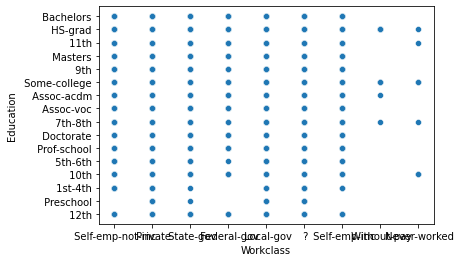

In [23]:
sns.scatterplot(x='Workclass',y='Education',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

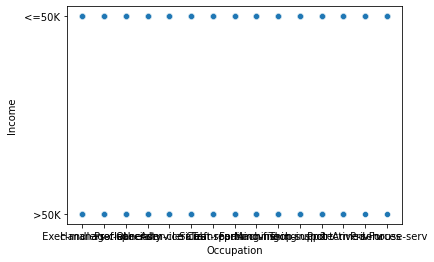

In [24]:
sns.scatterplot(x='Occupation',y='Income',data=df)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

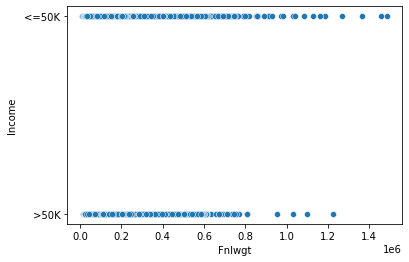

In [25]:
sns.scatterplot(x='Fnlwgt',y='Income',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Income'>

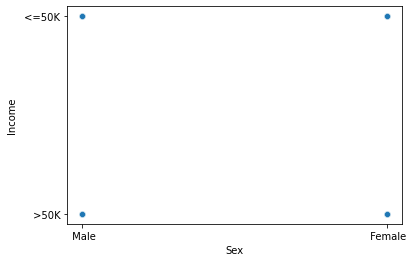

In [26]:
sns.scatterplot(x='Sex',y='Income',data=df)

MULTIVARIATE ANALYSIS-

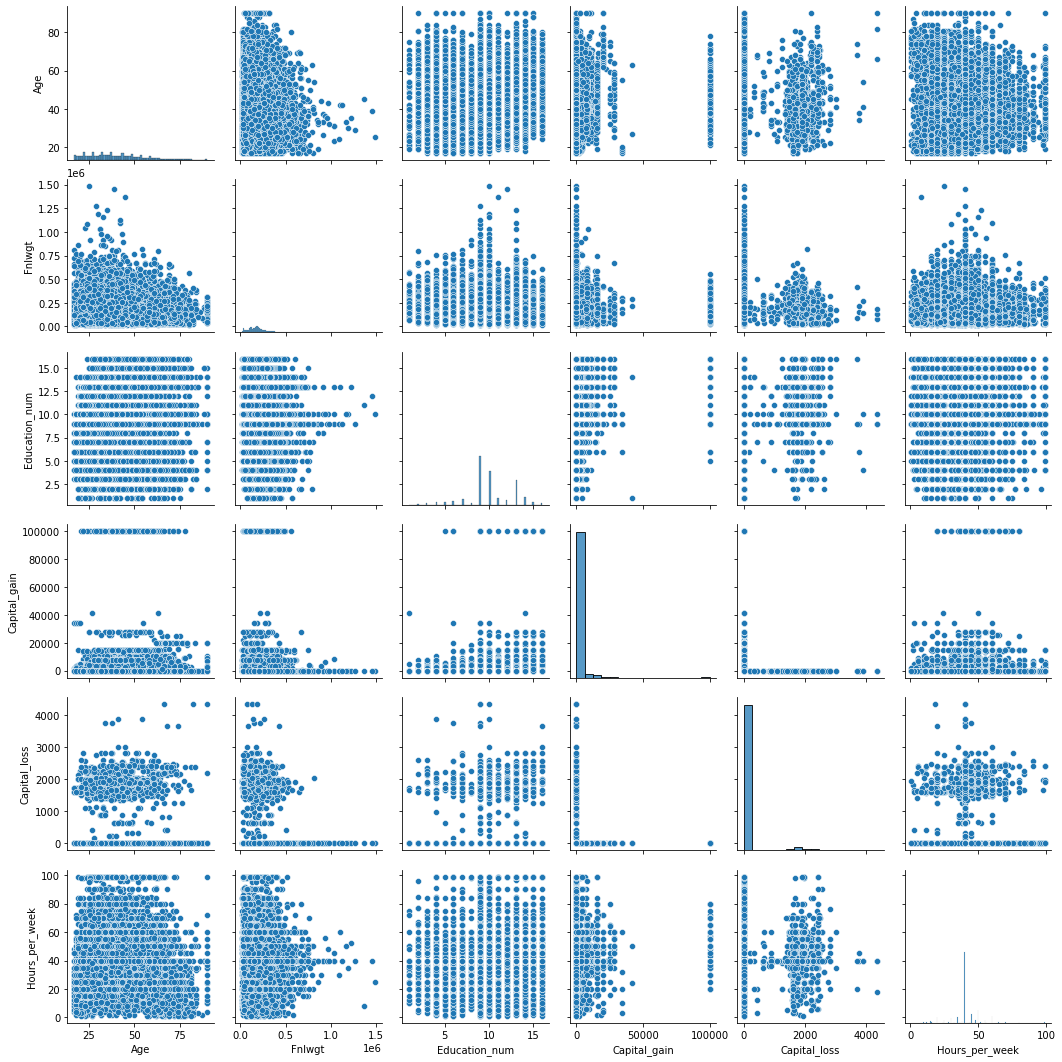

In [27]:
sns.pairplot(data=df)

From the above EDA we conclude that, there are more categorical data in our dataset than ordinal. There are more male candidates and education is HS-grad of most, which is a positive sign for world economy future. Most employees work more than 40 hours per week but still less people have income more than $50k. This is disappointing and companies should increase pay/hike according to the efforts of the employees.

Encoding the dataset-

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [31]:
df=df.drop(['Education_num'],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


We drop Education_num columns as it is not relevant to the prediction and can cause ambiguity and errors.

Correlation-

In [32]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.030047,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


Correlation using heatmap-

<AxesSubplot:>

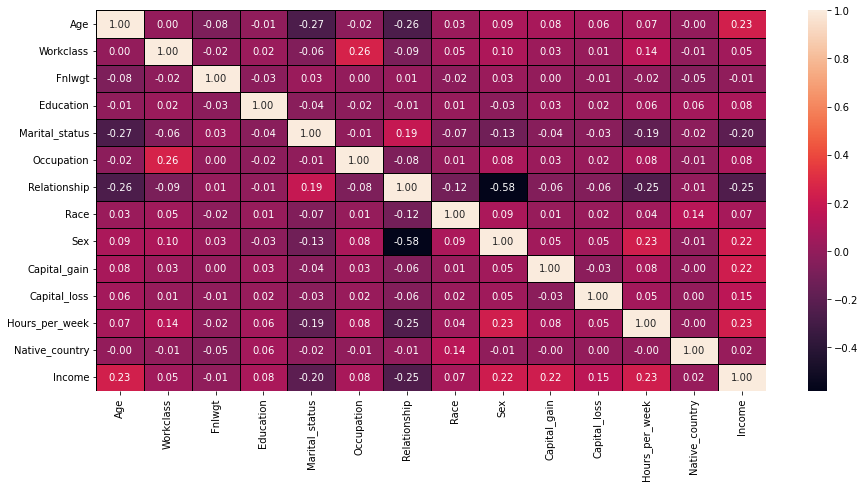

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Outcome of Correlation- We see that some data is positively correlated with the target data- Income, while some are negatively correlated to it.

Describing Datasets-

In [34]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


THE MEAN IS GREATER THAN THE MEDIAN SO THE DATA IS RIGHT SKEWED.

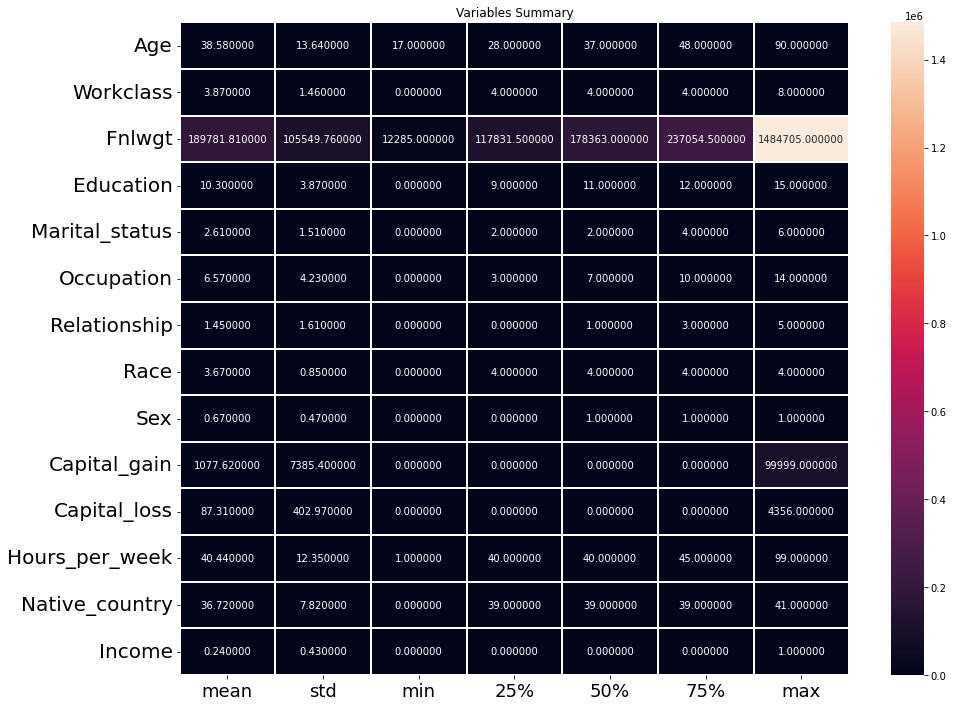

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title('Variables Summary')
plt.show()

In [36]:
df.shape

(32560, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Marital_status  32560 non-null  float64
 5   Occupation      32560 non-null  float64
 6   Relationship    32560 non-null  float64
 7   Race            32560 non-null  float64
 8   Sex             32560 non-null  float64
 9   Capital_gain    32560 non-null  int64  
 10  Capital_loss    32560 non-null  int64  
 11  Hours_per_week  32560 non-null  int64  
 12  Native_country  32560 non-null  float64
 13  Income          32560 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.5 MB


From the above code we can have the columns datatype and the memory used by the dataframe.

In [38]:
df['Income'].unique()

array([0., 1.])

Outliers checking-

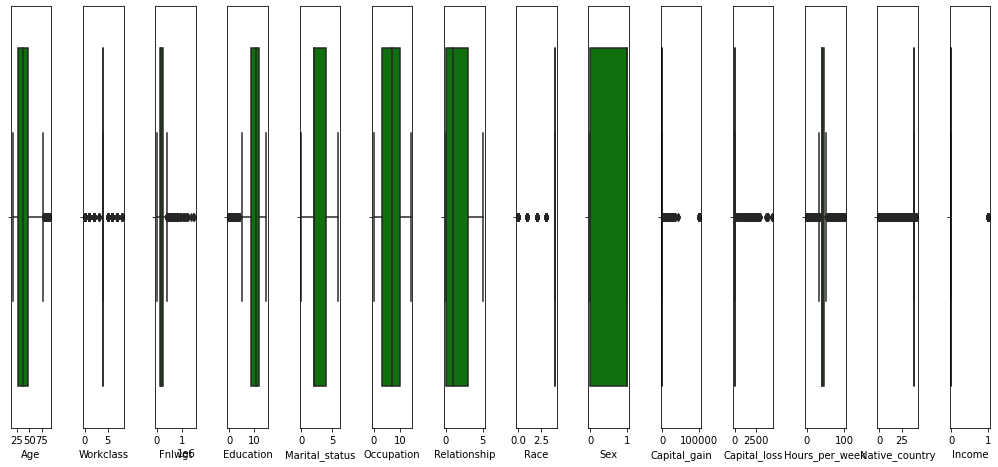

In [39]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Skewness-

In [40]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Outcome of skewness: Skewness threshold is taken as +/-5.0.

Columns which are having skewness: Capital_gain

Normal Distribution Curve-

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

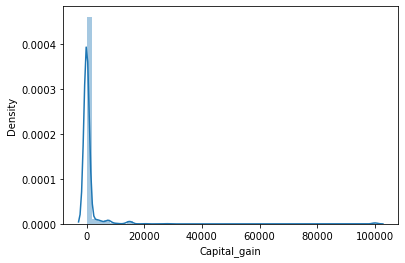

In [41]:
sns.distplot(df['Capital_gain'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

The normal distribution shows that the data is skewed.

Data Cleaning-

In [42]:
delete=pd.DataFrame([['11.953690','Capital_gain','No','Alot']],columns=['Correlation with Target','Column Name','Normalised','Outliers'])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,11.953690,Capital_gain,No,Alot


In [43]:
df=df.drop(['Capital_gain'],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0,13,39.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0,40,39.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0,40,39.0,0.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,2.0,0.0,0,40,5.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,4.0,0.0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,4.0,1.0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,4.0,0.0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,4.0,1.0,0,20,39.0,0.0


In [44]:
df.shape

(32560, 13)

Removing outliers-

Z-score Technique:

In [45]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x is independent variable and y (Income) is target variable.

In [46]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552]),
 array([11, 10,  7, ...,  7,  7,  7]))

In [47]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0,13,39.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0,40,39.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0,40,39.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0,40,39.0,0.0
5,49,4.0,160187,6.0,3.0,8.0,1.0,2.0,0.0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,4.0,0.0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,4.0,1.0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,4.0,0.0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,4.0,1.0,0,20,39.0,0.0


Percentage of data loss-

In [48]:
data_loss=((32560-27748)/32560)*100
data_loss

14.77886977886978

Oversampling the data-

In [49]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [50]:
y.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

CLASSIFICATION MODEL-

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

Splitting the dataframe-

In [52]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,i)==round(accuracy_score(y_test,pred_test)*100,i):
        print('At random state',i,'The model performs very well')
        print('At random state: ',i)
        print('Training accuracy is:',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy is:',accuracy_score(y_test,pred_test)*100)

At random state 307 The model performs very well
At random state:  307
Training accuracy is: 66.5992414664981
Testing accuracy is: 67.09142394822007
At random state 308 The model performs very well
At random state:  308
Training accuracy is: 64.7433628318584
Testing accuracy is: 64.66423948220064


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=307)

We take random state as 307 because the difference between training and testing accuracy is the least there.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.51      0.33      0.40      4972
         1.0       0.50      0.67      0.57      4916

    accuracy                           0.50      9888
   macro avg       0.50      0.50      0.49      9888
weighted avg       0.50      0.50      0.49      9888



Cross validation score-

In [55]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross validation score is',lsc*100)
    print('Accuracy score is',lss*100)
    print('\n')

At cv: 2
Cross validation score is 64.65674177758
Accuracy score is 59.385113268608414


At cv: 3
Cross validation score is 62.5348487071218
Accuracy score is 59.385113268608414


At cv: 4
Cross validation score is 63.35010815199331
Accuracy score is 59.385113268608414


At cv: 5
Cross validation score is 65.19679825392632
Accuracy score is 59.385113268608414


At cv: 6
Cross validation score is 63.220404002433774
Accuracy score is 59.385113268608414


At cv: 7
Cross validation score is 61.84316271892571
Accuracy score is 59.385113268608414


At cv: 8
Cross validation score is 63.60097078213032
Accuracy score is 59.385113268608414


At cv: 9
Cross validation score is 63.6737822228493
Accuracy score is 59.385113268608414




In [56]:
lsscore_selected=cross_val_score(lr,x,y,cv=3).mean()
print('The cv score is',lsscore_selected,'\n The accuracy score is',lss)

The cv score is 0.625348487071218 
 The accuracy score is 0.5938511326860841


In [57]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8905744336569579
[[4502  470]
 [ 612 4304]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      4972
         1.0       0.90      0.88      0.89      4916

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



In [58]:
score=cross_val_score(RFC,x,y,cv=3)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.62184466 0.92657321 0.92893986]
0.825785912481336
Difference between Accuracy score and cross validation score is:  0.06478852117562184


In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5261933656957929
[[2095 2877]
 [1808 3108]]
              precision    recall  f1-score   support

         0.0       0.54      0.42      0.47      4972
         1.0       0.52      0.63      0.57      4916

    accuracy                           0.53      9888
   macro avg       0.53      0.53      0.52      9888
weighted avg       0.53      0.53      0.52      9888



Checking cv score for Support vector machine classifier-

In [60]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predsvc)-score.mean())

KeyboardInterrupt: 

Checking accuracy score for Gradient Boosting Classifier-

In [61]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8944174757281553
[[4503  469]
 [ 575 4341]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4972
         1.0       0.90      0.88      0.89      4916

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



Checking cv score for Gradient Boosting Classifier-

In [62]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predGB)-score.mean())

[0.73068366 0.84051375 0.92849919 0.93466168 0.9307171 ]
0.8730150764316388
Difference between Accuracy score and cross validation score is:  0.02140239929651655


Checking accuracy score using KNN-

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pr=knn.predict(x_test)
print(pr)
print('Accuracy score is:', accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

[0. 1. 0. ... 1. 1. 0.]
Accuracy score is: 0.6660598705501618
[[2938 2034]
 [1268 3648]]
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64      4972
         1.0       0.64      0.74      0.69      4916

    accuracy                           0.67      9888
   macro avg       0.67      0.67      0.66      9888
weighted avg       0.67      0.67      0.66      9888



Checking cv score for KNN-

In [64]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,pr)-score.mean())

[0.64441748 0.66080097 0.67485841 0.6738141  0.66390209]
0.6635586107644211
Difference between Accuracy score and cross validation score is:  0.0025012597857406726


We see that RFC is the best model here because it has the least difference between Accuracy score and Cross Validation Score.

Hyper parameter tuning-

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid={'n_estimators': [200,500],
           'max_features': ['auto','sqrt','log2'],
           'max_depth': [4,5,6,7,8],
           'criterion': ['gini','entropy']}

In [67]:
grid=GridSearchCV(RFC,param_grid,cv=3)

In [68]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [69]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [70]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500)


In [71]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([0., 1., 0., ..., 0., 1., 1.])

In [72]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86      4972
         1.0       0.83      0.92      0.87      4916

    accuracy                           0.86      9888
   macro avg       0.87      0.86      0.86      9888
weighted avg       0.87      0.86      0.86      9888



Accuracy score is 86% which means our model is performing very good.

AUC ROC CURVE-

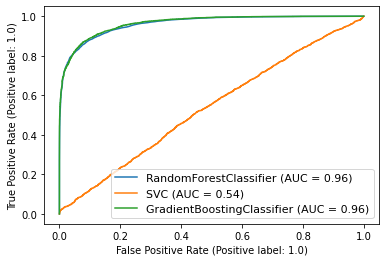

In [73]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(RFC,x_test,y_test)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

Model Saving-

In [74]:
import pickle
filename='census1.pk1'
pickle.dump(lr,open(filename,'wb'))

Conclusion-

In [75]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
9883,1.0,1.0
9884,0.0,0.0
9885,0.0,0.0
9886,1.0,1.0


We can visualize that there is minimal error in the outcome using the above model.

THE END